In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")

In [178]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [171]:
categorical = ['sex', 'smoking', 'diabetes', 'anaemia', 'high_blood_pressure']
numerical = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [179]:
scaled_data = data.copy().drop('DEATH_EVENT', axis=1)

In [180]:
scaler = MinMaxScaler()
scaled_data[numerical] = scaler.fit_transform(scaled_data[numerical])


In [182]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])
scaled_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235


In [183]:
scaled_data = pd.concat([data[categorical], scaled_data, data['DEATH_EVENT']], axis=1)
scaled_data.head()

,sex,smoking,diabetes,anaemia,high_blood_pressure,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,0,0,0,1,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1
1,1,0,0,0,0,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1
2,1,1,0,0,0,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676,1
3,1,0,0,1,0,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676,1
4,0,0,1,1,0,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235,1


In [184]:
scaled_data.describe()

,sex,smoking,diabetes,anaemia,high_blood_pressure,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.648829,0.32107,0.418060,0.431438,0.351171,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107,0.449327,0.32107
std,0.478136,0.46767,0.494067,0.496107,0.478136,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767,0.276207,0.46767
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000,0.245552,0.00000
50%,1.000000,0.00000,0.000000,0.000000,0.000000,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,0.395018,0.00000
75%,1.000000,1.00000,1.000000,1.000000,1.000000,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000,0.708185,1.00000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


In [185]:
from sklearn.decomposition import PCA

pca_data = scaled_data.drop('DEATH_EVENT', axis=1)

pca = PCA()
pca.fit(pca_data)

persentase = np.round(pca.explained_variance_ratio_*100, decimals=2)

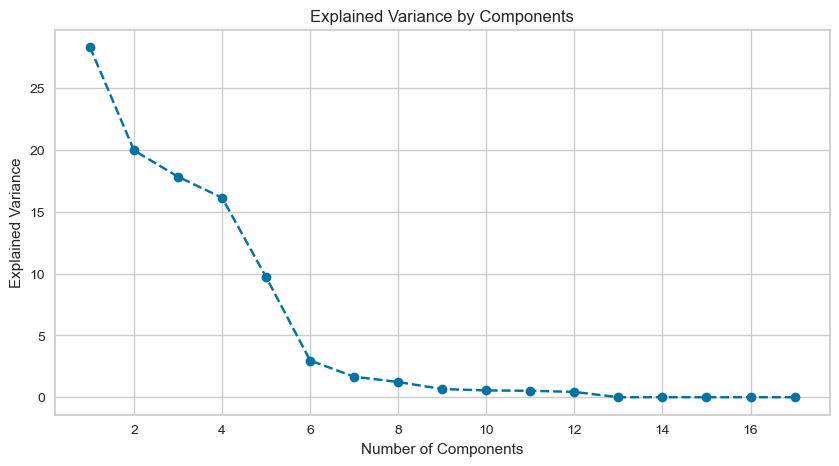

In [186]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(persentase)+1), persentase, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [187]:
pca95 = PCA(n_components=0.95)
pca95.fit_transform(pca_data).shape

(299, 7)

In [188]:
pca_data

,sex,smoking,diabetes,anaemia,high_blood_pressure,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,0,0,0,1,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000
1,1,0,0,0,0,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117
2,1,1,0,0,0,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676
3,1,0,0,1,0,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676
4,0,0,1,1,0,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,1,1,0,1,0.400000,0,0.004848,1,0.363636,1,0.157474,0.067416,0.857143,1,1,0.946619
295,0,0,0,0,0,0.272727,0,0.229268,0,0.363636,0,0.296884,0.078652,0.742857,0,0,0.950178
296,0,0,1,0,0,0.090909,0,0.259888,1,0.696970,0,0.869075,0.033708,0.714286,0,0,0.975089
297,1,1,0,0,0,0.090909,0,0.304925,0,0.363636,0,0.139290,0.101124,0.771429,1,1,0.982206


Text(0, 0.5, 'Loss')

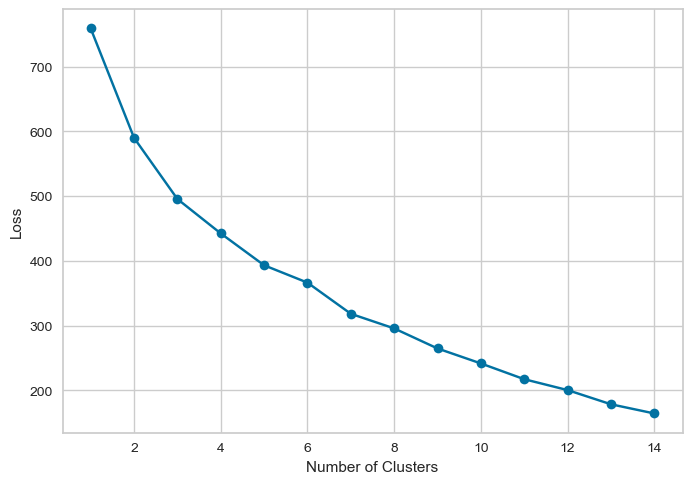

In [189]:
losses = []
for K in range(1, 15):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(scaled_data.iloc[:,:-1])
    losses.append(kmeans.inertia_)

plt.plot(range(1,15), losses, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')

In [203]:
for i in range(1, 15):
    print(f'Loss for {i} clusters: {losses[i-1]}')

Loss for 1 clusters: 758.8100199413739
Loss for 2 clusters: 589.8360985253835
Loss for 3 clusters: 495.41298806040044
Loss for 4 clusters: 442.3118194321593
Loss for 5 clusters: 393.1283986712631
Loss for 6 clusters: 366.3238339258876
Loss for 7 clusters: 318.21320774073433
Loss for 8 clusters: 295.62151076075526
Loss for 9 clusters: 264.6723425782104
Loss for 10 clusters: 241.56228275640237
Loss for 11 clusters: 217.2052896847623
Loss for 12 clusters: 200.4024938151956
Loss for 13 clusters: 178.5069264869798
Loss for 14 clusters: 164.32284562495914


In [206]:
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=500)
kmeans = kmeans.fit(scaled_data.iloc[:,:-1])
kmeans_label = kmeans.labels_

In [207]:
kmeans_label = pd.DataFrame(kmeans_label, columns=['K-Means label'])
kmeans_label

,K-Means label
0,1
1,1
2,0
3,1
4,1
...,...
294,0
295,1
296,1
297,0


In [208]:
pd.concat([kmeans_label, scaled_data.iloc[:, -1:]], axis=1).head()

,K-Means label,DEATH_EVENT
0,1,1
1,1,1
2,0,1
3,1,1
4,1,1


In [209]:
y = data.iloc[:, -1:]

import sklearn.metrics as metrics

print('K-means accuracy: %.4f'%metrics.accuracy_score(kmeans_label, y))

K-means accuracy: 0.4448


Text(0, 0.5, 'silhouette score')

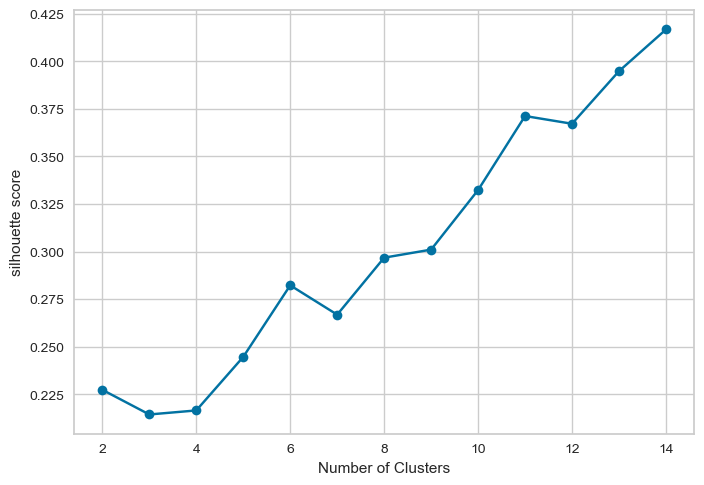

In [201]:
silhoutte_scores = []
for K in range(2, 15):
    kmeans = KMeans(n_clusters=K)
    labels = kmeans.fit_predict(scaled_data.iloc[:,:-1])
    score = silhouette_score(scaled_data.iloc[:,:-1], labels)
    silhoutte_scores.append(score)
    
plt.plot(range(2,15), silhoutte_scores, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')

In [202]:
for i in range (2, 15):
    print(f'Silhouette score for {i} clusters: {silhoutte_scores[i-2]}')

Silhouette score for 2 clusters: 0.22740080132189106
Silhouette score for 3 clusters: 0.2144484516867944
Silhouette score for 4 clusters: 0.21656861177848208
Silhouette score for 5 clusters: 0.24469743899876598
Silhouette score for 6 clusters: 0.2823025424148468
Silhouette score for 7 clusters: 0.2668874195367798
Silhouette score for 8 clusters: 0.296838334778089
Silhouette score for 9 clusters: 0.3010698990236291
Silhouette score for 10 clusters: 0.33236901174248185
Silhouette score for 11 clusters: 0.3712628436248364
Silhouette score for 12 clusters: 0.36720033390302104
Silhouette score for 13 clusters: 0.3948449746500275
Silhouette score for 14 clusters: 0.4167404042804733
